In [1]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import math
import operator
import tensorflow as tf
import random
import time
import heapq

import numpy as np
import matplotlib.pyplot as plt

/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
df = pd.read_csv('/Users/architaggarwal/Downloads/ELL409/Medical_data.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Health,TEST1,TEST2,TEST3
0,SURGERY,0.132043,2.148042,1.056993
1,MEDICATION,3.095802,-0.999136,0.149243
2,SURGERY,0.134757,2.862937,0.174722
3,HEALTHY,3.626849,-0.053386,0.244341
4,SURGERY,0.230009,-0.066107,3.055528
5,HEALTHY,2.130433,0.301885,1.719934
6,SURGERY,-0.515606,-0.952698,2.978561
7,SURGERY,0.125470,1.968753,1.708864
8,MEDICATION,0.800504,3.265328,0.007677
9,SURGERY,-0.023225,3.038201,0.329471


In [3]:
x = df.loc[:, "TEST1":"TEST3"]
y = df.loc[:, "Health"]
x = x.values
y = y.values
b, c = np.unique(y, return_inverse=True)
y = c
print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
# stratSplit = StratifiedShuffleSplit(y, 1, test_size=0.33,random_state=42)
# StratifiedShuffleSplit(y, n_iter=1, test_size=0.33)
# for train_idx,test_idx in stratSplit:
#     X_train=X[train_idx]
#     y_train=y[train_idx]
# print(X_train)
# print(y_train)
# x_train = x[0:2500, :]
# x_test = x[2500:3000, :]
# y_train = y[0:2500]
# y_test = y[2500:3000]

((3000, 3), (3000,))


In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (2100, 3), 'y_train shape:', (2100,))


In [5]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (900, 3), 'y_test shape:', (900,))


In [6]:
df.describe()

,TEST1,TEST2,TEST3
count,3000.000000,3000.000000,3000.000000
mean,1.110536,1.112470,1.121078
std,1.222244,1.316130,1.252465
min,-1.605940,-1.866510,-1.720930
25%,0.035033,-0.002508,0.005586
50%,0.967292,0.640691,0.928323
75%,2.107152,2.239074,2.154511
max,4.589089,5.148352,5.098854


In [7]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#PCA
A = x_train
M = mean(x_train.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[  5.21462918e-01   7.06201792e-01   4.78910695e-01]
 [  6.76093636e-01   4.40527858e-04  -7.36815581e-01]
 [  5.20551457e-01  -7.08010477e-01   4.77228819e-01]]
------
[ 0.19866205  1.127188    1.67557921]
------
[[-0.26757461  1.00174913  0.76748258]
 [-0.48963339  0.98139615 -0.4610708 ]
 [-0.23847493  0.31995934 -1.15058439]
 ..., 
 [ 0.04650402  0.94012716 -0.26043165]
 [ 0.3781487  -0.22240201 -1.38690812]
 [-0.47318221 -0.30099544  0.65109681]]


In [9]:
values_index = sorted(range(len(values)), key=lambda k: values[k], reverse = True)
print(values_index)
values_sorted = sorted(values, reverse = True)
print(values_sorted)

[2, 1, 0]
[1.6755792054379528, 1.1271880013012634, 0.19866204528555254]


[ 1.67557921  2.80276721  3.00142925]


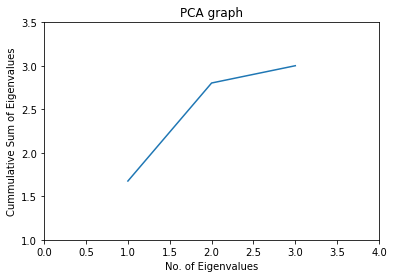

In [10]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((3))
till_now = 0.0
for i in range(3):
    cumm_sum[i] = till_now + values_sorted[i]
    till_now = till_now + values_sorted[i]
no_of_eigenvalues = range(1,4)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
plt.axis([0, 4, 1, 3.5])
plt.xlabel("No. of Eigenvalues")
plt.ylabel("Cummulative Sum of Eigenvalues")
plt.title("PCA graph")
plt.show()

In [11]:
#Mean of each attribute for each class
def mean_attribute_class(x_train, y_train, n_classes, n_features):
    mean_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(len(x_train)):
        mean_values[y_train[i]] = mean_values[[y_train[i]]] + x_train[i]
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        mean_values[a] = mean_values[a].astype('float32') / store_frequency[a]
    return mean_values

In [12]:
mean_values = mean_attribute_class(x_train, y_train, 3, 3)
mean_values

array([[ 0.6646679 , -0.83294791,  0.59918147],
       [ 0.22542267,  0.38372529, -0.90546751],
       [-0.89009058,  0.44922262,  0.30628604]])

In [13]:
#Standard Deviation(N-1) of rach attribute for each class
def standard_deviation(x_train, y_train, n_classes, n_features):
    std_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(x_train.shape[0]):
        std_values[y_train[i]] = std_values[y_train[i]] + (x_train[i] - mean_values[y_train[i]])*(x_train[i] - mean_values[y_train[i]])
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        std_values[a] = std_values[a].astype('float32') / (store_frequency[a] - 1)
    std_values = np.sqrt(std_values)
    return std_values

In [14]:
std_values = standard_deviation(x_train, y_train, 3, 3)
std_values

array([[ 0.83682087,  0.16705716,  0.72590086],
       [ 0.9903023 ,  0.9682302 ,  0.17716315],
       [ 0.19137884,  0.99728326,  1.082336  ]])

In [15]:
#Naive Bayes
def calculateprobability(x_test, y_test, n_classes, n_features):
    count = 0
    for i in range(x_test.shape[0]):
        store_prob = np.ones((n_classes))
        for j in range(n_features):
            for k in range(n_classes):
                exponent = math.exp((-1*math.pow(x_test[i][j] - mean_values[k][j], 2)) / math.pow(std_values[k][j], 2))
                final_term = (1 / (math.sqrt(2*math.pi)*std_values[k][j])) * exponent
                store_prob[k] = store_prob[k] * final_term
        index, value = max(enumerate(store_prob), key=operator.itemgetter(1))
#         print(store_prob)
#         print("Prob = ", value, "Class = ", index, "Original = ", y_train[i])
        if index == y_test[i]:
            count = count + 1
        print(i)
    print(count, x_test.shape[0])

In [16]:
calculateprobability(x_test, y_test, 3, 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
#K Means Clustering
def calculatecentroids(x_train, y_train, k, tolerance=0.0001, max_iterations=1000):
#     k = 10
#     tolerance = 0.0001
#     max_iterations = 1000
    centroids = {}
    for i in range(k):
        print("hallelujah")
        choose = random.randint(0, x_train.shape[0] - k) + i
        centroids[i] = x_train[choose]
    print('Centroids = ', centroids)
    for i in range(max_iterations):
        print("i = ", i)
        classes = {}
        for j in range(k):
            classes[j] = []
        for each in x_train:
            distances = [np.linalg.norm(each - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(each)
        
        previous = dict(centroids)
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        isOptimal = True
        for centroid in centroids:
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            print("Factor = ", np.sum((curr - original_centroid)/original_centroid * 100.0))
            if abs(np.sum((curr - original_centroid)/original_centroid * 100.0)) > tolerance:
                isOptimal = False
        if isOptimal:
            break
    return centroids
#     count = 0
#     for i in range(60000):
#         distances = [np.linalg.norm(x_train_final[i] - centroids[centroid]) for centroid in centroids]
#         classification = distances.index(min(distances))
#         if classification == y_train[i]:
#             count = count + 1
#         print(i)
#     print(count)

In [18]:
centroids = calculatecentroids(x_train, y_train, 3, 0.0001, 1000)
centroids

hallelujah
hallelujah
hallelujah
('Centroids = ', {0: array([ 0.71756474, -0.7554518 , -1.07324652]), 1: array([-0.84758723,  1.53973975, -1.01168157]), 2: array([ 1.28604427, -0.81386119, -0.0030503 ])})
('i = ', 0)
('Factor = ', -91.277805924373496)
('Factor = ', -84.019928334764103)
('Factor = ', -26301.204778650768)
('i = ', 1)
('Factor = ', 69.285060868156748)
('Factor = ', 10.006215195790482)
('Factor = ', -39.123496093555076)
('i = ', 2)
('Factor = ', 13.142512963928887)
('Factor = ', 3.3692969476824244)
('Factor = ', -50.550036966871851)
('i = ', 3)
('Factor = ', 6.4503140144087263)
('Factor = ', 1.5073831642343043)
('Factor = ', -63.407733850583917)
('i = ', 4)
('Factor = ', 2.5664342808690321)
('Factor = ', -0.54642839729815251)
('Factor = ', -153.17050178245444)
('i = ', 5)
('Factor = ', 2.0914016747878907)
('Factor = ', -0.45696014784504446)
('Factor = ', 245.13578416936795)
('i = ', 6)
('Factor = ', 0.055919971898076959)
('Factor = ', -0.83239331907875591)
('Factor = ', 51

{0: array([ 1.0999904 , -0.63128192, -0.30878774]),
 1: array([-0.70415996,  1.08478191, -0.59583773]),
 2: array([-0.36077599, -0.75486512,  1.22265834])}

In [21]:
#K Nearest Neighbour
def euclidean_distance(instance1, instance2):
    sum = 0
    for i in range(len(instance1)):
        sum += (instance1[i] - instance2[i])**2
    sum = math.sqrt(sum)
    return sum

def predict_accuracy(x_train, y_train, x_test, y_test, k, n_classes, n_features):
#     k = 10
    count = 0
    for i in range(x_test.shape[0]):
#         start = time.time()
#         store_distances = np.zeros((x_train_final.shape[0], 2))
        x_train_final_copy = x_train - x_test[i]
        store_distances = np.sqrt(np.sum(np.square(x_train_final_copy), axis=1))
#         store_distances = [[np.linalg.norm(x_test_final[i] - each), each1] for each, each1 in zip(x_train_final, y_train)]
#         for j in range(x_train_final.shape[0]):
# #             distance = euclidean_distance(x_test_final[i], x_train_final[j])
#             distance = np.linalg.norm(x_test_final[i] - x_train_final[j])
#             store_distances[j] = [distance, y_train[j]]
#         store_distances = np.array(store_distances)
#         print(store_distances.shape)
#         print(store_distances)
        store_labels = y_train[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)]
        final_class = stats.mode(store_labels).mode[0]
#         store_frequency = [0]*10
#         print(store_distances)
#         for j in range(len(store_distances)):
#             store_frequency[int(store_distances[j][1])] += 1
            
#         final_class = store_frequency.index(max(store_frequency))
        
        if y_test[i] == final_class:
            count = count + 1
#         print(final_class, y_test[i])
#         print(count, i)
#         end = time.time()
#         print(end - start)
    return(count)
#     print(count)

In [20]:
count = predict_accuracy(x_train, y_train, x_test, y_test, 3, 3, 3)
count

('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.09819262  1.        ]
 [ 0.12651149  1.        ]
 [ 0.14172809  1.        ]]
(1, 1)
(1, 0)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.16891999  1.        ]
 [ 0.17903686  1.        ]
 [ 0.21000268  1.        ]]
(1, 1)
(2, 1)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.15395186  1.        ]
 [ 0.16439088  1.        ]
 [ 0.18149536  1.        ]]
(1, 1)
(3, 2)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.22819261  2.        ]
 [ 0.23327879  2.        ]
 [ 0.28639627  2.        ]]
(2, 2)
(4, 3)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.09455904  0.        ]
 [ 0.10594073  0.        ]
 [ 0.13462459  2.        ]]
(0, 2)
(4, 4)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.16426115  2.        ]
 [ 0.16688153  2.        ]
 [ 0.1753079   2.        ]]
(2, 2)
(5, 5)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.26508134  2.        ]
 [ 0.33747834  2.        ]
 [ 0.3391818   0.        ]]
(2, 0)
(5, 6)
('j = ', 0)
('j = ', 700)
('j = ', 1400)


('j = ', 1400)
[[ 0.14093658  2.        ]
 [ 0.14780114  2.        ]
 [ 0.15490766  2.        ]]
(2, 2)
(122, 142)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.1838872   0.        ]
 [ 0.2131918   0.        ]
 [ 0.23115628  0.        ]]
(0, 0)
(123, 143)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.1626208   1.        ]
 [ 0.16284715  0.        ]
 [ 0.17506119  1.        ]]
(1, 1)
(124, 144)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.08876158  1.        ]
 [ 0.09790562  0.        ]
 [ 0.17611489  0.        ]]
(0, 0)
(125, 145)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.11109545  0.        ]
 [ 0.12444667  0.        ]
 [ 0.13840314  0.        ]]
(0, 0)
(126, 146)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.08603053  0.        ]
 [ 0.10606989  0.        ]
 [ 0.10868576  0.        ]]
(0, 0)
(127, 147)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.10950466  0.        ]
 [ 0.11380168  1.        ]
 [ 0.14652109  1.        ]]
(1, 1)
(128, 148)
('j = ', 0)
('j = ', 700)
('j = ', 1400

('j = ', 1400)
[[ 0.13876149  1.        ]
 [ 0.17302829  1.        ]
 [ 0.17467005  1.        ]]
(1, 1)
(210, 236)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.07523092  0.        ]
 [ 0.08130393  0.        ]
 [ 0.09835932  0.        ]]
(0, 0)
(211, 237)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.13364967  0.        ]
 [ 0.13494331  0.        ]
 [ 0.14308666  0.        ]]
(0, 0)
(212, 238)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.01732507  2.        ]
 [ 0.09276065  2.        ]
 [ 0.14764822  2.        ]]
(2, 2)
(213, 239)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.2708539   2.        ]
 [ 0.31077926  2.        ]
 [ 0.35352929  2.        ]]
(2, 2)
(214, 240)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.04756054  0.        ]
 [ 0.05434033  0.        ]
 [ 0.07511674  0.        ]]
(0, 0)
(215, 241)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.2059808   0.        ]
 [ 0.25727351  0.        ]
 [ 0.25739232  0.        ]]
(0, 0)
(216, 242)
('j = ', 0)
('j = ', 700)
('j = ', 1400

('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.17031046  1.        ]
 [ 0.24461704  1.        ]
 [ 0.24671062  1.        ]]
(1, 1)
(341, 390)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.05745685  0.        ]
 [ 0.15603524  1.        ]
 [ 0.21964797  1.        ]]
(1, 1)
(342, 391)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.04510516  1.        ]
 [ 0.13056616  1.        ]
 [ 0.1627433   1.        ]]
(1, 1)
(343, 392)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.15145745  0.        ]
 [ 0.22744003  0.        ]
 [ 0.24391511  0.        ]]
(0, 0)
(344, 393)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.19791231  2.        ]
 [ 0.22267515  2.        ]
 [ 0.22650343  2.        ]]
(2, 2)
(345, 394)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.12158574  0.        ]
 [ 0.15881622  0.        ]
 [ 0.18211268  0.        ]]
(0, 0)
(346, 395)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.10350575  0.        ]
 [ 0.12107074  2.        ]
 [ 0.12983798  0.        ]]
(0, 2)
(346, 396)
('j = ', 0)
(

[[ 0.10223039  2.        ]
 [ 0.10704237  2.        ]
 [ 0.12195629  2.        ]]
(2, 2)
(421, 479)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.07574674  2.        ]
 [ 0.08795601  2.        ]
 [ 0.15787644  2.        ]]
(2, 2)
(422, 480)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.10298758  0.        ]
 [ 0.16393292  0.        ]
 [ 0.22974695  0.        ]]
(0, 0)
(423, 481)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.1765351   2.        ]
 [ 0.19600809  2.        ]
 [ 0.19690491  2.        ]]
(2, 2)
(424, 482)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.05459789  2.        ]
 [ 0.11423398  2.        ]
 [ 0.14878582  1.        ]]
(2, 1)
(424, 483)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.31598287  1.        ]
 [ 0.36088605  1.        ]
 [ 0.40461534  1.        ]]
(1, 1)
(425, 484)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.03792349  0.        ]
 [ 0.08112092  0.        ]
 [ 0.12829406  0.        ]]
(0, 0)
(426, 485)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.07019311

('j = ', 1400)
[[ 0.06990357  2.        ]
 [ 0.10843166  2.        ]
 [ 0.12684592  2.        ]]
(2, 0)
(506, 576)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.08032864  0.        ]
 [ 0.0867232   0.        ]
 [ 0.12759981  0.        ]]
(0, 0)
(507, 577)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.1522007   2.        ]
 [ 0.18656102  2.        ]
 [ 0.18937271  2.        ]]
(2, 2)
(508, 578)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.02541157  0.        ]
 [ 0.13688266  0.        ]
 [ 0.14330281  0.        ]]
(0, 0)
(509, 579)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.14780842  2.        ]
 [ 0.16055717  2.        ]
 [ 0.2172044   2.        ]]
(2, 2)
(510, 580)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.08950454  0.        ]
 [ 0.09072058  0.        ]
 [ 0.11632121  0.        ]]
(0, 0)
(511, 581)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.05945469  0.        ]
 [ 0.06523962  0.        ]
 [ 0.10201233  0.        ]]
(0, 0)
(512, 582)
('j = ', 0)
('j = ', 700)
('j = ', 1400

 [ 0.1816616   1.        ]]
(1, 1)
(640, 722)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.05695963  0.        ]
 [ 0.0609447   0.        ]
 [ 0.11662836  0.        ]]
(0, 0)
(641, 723)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.10157102  0.        ]
 [ 0.15030567  0.        ]
 [ 0.18233549  0.        ]]
(0, 0)
(642, 724)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.12134946  1.        ]
 [ 0.13392539  1.        ]
 [ 0.13617974  1.        ]]
(1, 0)
(642, 725)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.13742894  0.        ]
 [ 0.1677348   0.        ]
 [ 0.1691788   0.        ]]
(0, 0)
(643, 726)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.16282941  0.        ]
 [ 0.20401503  0.        ]
 [ 0.23805155  0.        ]]
(0, 0)
(644, 727)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.14397809  2.        ]
 [ 0.14558641  2.        ]
 [ 0.18304055  2.        ]]
(2, 2)
(645, 728)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.09918159  2.        ]
 [ 0.10583452  2.        ]
 [ 0.10718498

(729, 829)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.09279431  1.        ]
 [ 0.1822414   1.        ]
 [ 0.25751533  1.        ]]
(1, 1)
(730, 830)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.07325142  1.        ]
 [ 0.07976382  1.        ]
 [ 0.11358033  1.        ]]
(1, 1)
(731, 831)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.16232885  1.        ]
 [ 0.16568704  1.        ]
 [ 0.18464729  1.        ]]
(1, 1)
(732, 832)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.07733801  2.        ]
 [ 0.08942877  2.        ]
 [ 0.0970735   2.        ]]
(2, 2)
(733, 833)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.0376767  0.       ]
 [ 0.0503427  0.       ]
 [ 0.0768698  0.       ]]
(0, 0)
(734, 834)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.12683225  0.        ]
 [ 0.14806628  0.        ]
 [ 0.16549652  0.        ]]
(0, 0)
(735, 835)
('j = ', 0)
('j = ', 700)
('j = ', 1400)
[[ 0.10085014  0.        ]
 [ 0.10107274  1.        ]
 [ 0.13244452  1.        ]]
(1, 0)
(735, 836)
('j = ',

796

In [18]:
count_class = np.bincount(y_train)
count_class

array([700, 700, 700])

In [19]:
#Bayes Classifier
def calculate_covariance(x_train, y_train, n_classes, n_features, count_class):
    store_seperate = {}
    x_train_sorted = x_train[np.argsort(y_train)]
    x_train_sorted = x_train_sorted[:,0:n_features]
    first = 0
    second = count_class[0]
    for i in range(n_classes):
        final_matrix = x_train_sorted[first : second, :] - mean_values[i][0:n_features]
        covariance_matrix = np.dot(final_matrix.T, final_matrix) / count_class[i]
        sign, logdet = np.linalg.slogdet(covariance_matrix)
#         print(sign, logdet)
        store_seperate[i] = [np.sqrt(sign*np.exp(logdet)), np.linalg.inv(covariance_matrix)]
#         print(i)
        if i < (n_classes - 1):
            first = second
            second = second + count_class[i+1]
    return store_seperate

def calculate_bayes(x_test, y_test, n_classes, store_covariance, n_features):
    count = 0
    for i in range(x_test.shape[0]):
        store_probability = [0]*n_classes
        for j in range(n_classes):
            final_matrix = x_test[i][0:n_features] - mean_values[j][0:n_features]
            exponent = np.exp(-0.5*final_matrix.T.dot(store_covariance[j][1]).dot(final_matrix))
            store_probability[j] = (1/(math.pow((2*np.pi), n_features/2)*store_covariance[j][0]))*exponent
#         store_probability = [np.exp(-0.5*((x_test[i][0:20] - mean_values[j][0:20]).T.dot(store_covariance[j][1]).dot((x_test[i][0:20] - mean_values[j][0:20]))))*(1/(np.pow((2*np.pi), 20/2)*store_covariance[j][1])) for j in range(10)]
        final_class = store_probability.index(max(store_probability))
        if final_class == y_test[i]:
            count = count + 1
#         print(store_probability, final_class)
#         print(count, i)
    return count

covariance cal
(636, 1)
covariance cal
(780, 2)
covariance cal
(807, 3)


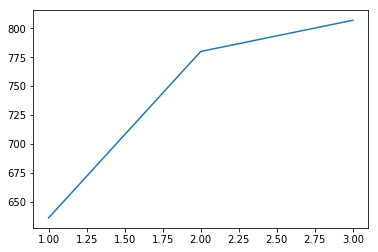

In [23]:
x_values = range(1, 4)
y_values = [0]*3
for i in range(1,4):
    store_covariance = calculate_covariance(x_train, y_train, 3, i, count_class)
    print("covariance cal")
    y_values[i-1] = calculate_bayes(x_test, y_test, 3, store_covariance, i)
    print(y_values[i - 1], i)
plt.plot(x_values, y_values)
plt.show()

In [22]:
#K Fold Cross Validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
skf.get_n_splits(x, y)
print(skf)
store_fold = [0]*50
for train_index, test_index in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train_dummy, x_test_dummy = x[train_index], x[test_index]
    y_train_dummy, y_test_dummy = y[train_index], y[test_index]
    scaler = StandardScaler()
    scaler.fit(x_train_dummy)
    x_train_dummy = scaler.transform(x_train_dummy)
    x_test_dummy = scaler.transform(x_test_dummy)
#     print(np.bincount(y_train_dummy), np.bincount(y_test_dummy))
#     A = x_train_dummy
#     M = mean(x_train_dummy.T, axis=1)
#     C = A - M
#     V = cov(C.T)
#     values, vectors = eig(V)
#     print(vectors)
#     print("------")
#     print(values)
#     print("------")
#     P = vectors.T.dot(C.T)
#     print(P.T)
#     C_test = x_test_dummy - M
#     P_test = vectors.T.dot(C_test.T)
#     print(P_test.T)
#     x_train_dummy = P.T[:, 0:3]
#     x_test_dummy = P_test.T[:, 0:3]
    for j in range(1, 51):
        count = predict_accuracy(x_train_dummy, y_train_dummy, x_test_dummy, y_test_dummy, j, 3, 3)
        store_fold[j-1] += count
        print(i, j, count)
    
#     mean_values_dummy = mean_attribute_class(x_train_dummy, y_train_dummy, 3, 3)
#     std_values_dummy = standard_deviation(x_train_dummy, y_train_dummy, 3, 3)
print(store_fold)
print(store_fold.index(max(store_fold)), max(store_fold))

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
(2, 1, 528)
(2, 2, 511)
(2, 3, 534)
(2, 4, 531)
(2, 5, 533)
(2, 6, 535)
(2, 7, 531)
(2, 8, 528)
(2, 9, 528)
(2, 10, 527)
(2, 11, 527)
(2, 12, 534)
(2, 13, 536)
(2, 14, 534)
(2, 15, 534)
(2, 16, 531)
(2, 17, 531)
(2, 18, 533)
(2, 19, 529)
(2, 20, 531)
(2, 21, 533)
(2, 22, 533)
(2, 23, 531)
(2, 24, 531)
(2, 25, 530)
(2, 26, 528)
(2, 27, 532)
(2, 28, 529)
(2, 29, 528)
(2, 30, 527)
(2, 31, 530)
(2, 32, 531)
(2, 33, 528)
(2, 34, 531)
(2, 35, 530)
(2, 36, 531)
(2, 37, 528)
(2, 38, 529)
(2, 39, 528)
(2, 40, 534)
(2, 41, 530)
(2, 42, 529)
(2, 43, 529)
(2, 44, 530)
(2, 45, 529)
(2, 46, 529)
(2, 47, 531)
(2, 48, 527)
(2, 49, 529)
(2, 50, 526)
(2, 1, 531)
(2, 2, 513)
(2, 3, 534)
(2, 4, 530)
(2, 5, 542)
(2, 6, 537)
(2, 7, 542)
(2, 8, 539)
(2, 9, 540)
(2, 10, 541)
(2, 11, 537)
(2, 12, 540)
(2, 13, 536)
(2, 14, 540)
(2, 15, 540)
(2, 16, 547)
(2, 17, 544)
(2, 18, 544)
(2, 19, 541)
(2, 20, 545)
(2, 21, 541)
(2, 22, 543)
(2, 23, 543)
(2, 24, 544

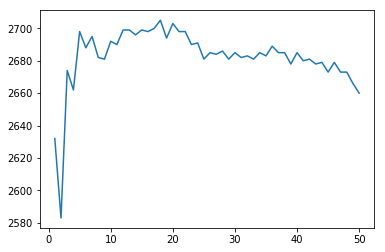

In [23]:
plt.plot(range(1,51), store_fold)
plt.show()